In [1]:
%matplotlib inline
import itertools
import numpy, scipy, matplotlib.pyplot as plt, pandas, librosa,sklearn
import config

from sklearn.svm import SVC

In [2]:
data_set=pandas.read_csv('data_set.csv',index_col=False)
GENRES=['METAL', 'CLASSICAL', 'HIPHOP', 'BLUES', 'POP', 'REGGAE']

number_of_rows,number_of_cols = data_set.shape
data_set.head()

,meanZCR,stdZCR,meanSpecCentroid,stdSpecCentroid,meanSpecContrast,stdSpecContrast,meanSpecBandwidth,stdSpecBandwidth,meanSpecRollof,stdSpecRollof,...,stdMFCC_9,meanMFCC_10,stdMFCC_10,meanMFCC_11,stdMFCC_11,meanMFCC_12,stdMFCC_12,meanMFCC_13,stdMFCC_13,genre
0,-0.505871,-0.784343,-0.381408,-0.691147,-0.107291,0.349902,-0.187280,-0.572265,-0.236668,-0.455356,...,-0.114378,-0.174782,-0.716931,0.379757,-0.826331,0.065192,-0.802478,0.243325,-0.609704,blues
1,-0.789556,-0.726759,-0.559681,-0.463433,-0.214652,0.274741,-0.139501,-0.414690,-0.333817,0.018836,...,0.103460,0.112254,-0.611377,0.466185,-0.771335,0.270596,-0.480038,0.286445,-0.546068,blues
2,-0.590099,-0.556617,-0.500726,-0.520669,0.110841,0.342202,-0.352145,-0.704373,-0.413241,-0.486896,...,-0.166338,-0.354216,-0.664704,0.180107,-0.751552,-0.094467,-0.647450,-0.182938,-0.530300,blues
3,-0.943024,-0.920130,-0.872967,-0.743929,-0.069544,0.043430,-0.635685,-0.596014,-0.772659,-0.550906,...,-0.747465,0.293044,-0.776384,0.104992,-0.925492,0.202960,-0.847504,-0.116092,-0.708645,blues
4,-0.205440,-0.400993,-0.236112,-0.243814,0.190382,0.270769,-0.310327,-0.532099,-0.198146,-0.129946,...,0.135571,-0.436034,-0.672466,-0.180337,-0.717212,0.166494,-0.222193,-0.367990,-0.278997,blues


In [3]:
from sklearn.model_selection import train_test_split

data_set_values=numpy.array(data_set)

train, test = train_test_split(data_set_values, test_size = 0.85,random_state=2,
                              stratify=data_set_values[:,number_of_cols-1])

train_x=train[:,:number_of_cols-1]
train_y=train[:,number_of_cols-1]

test_x=test[:,:number_of_cols-1]
test_y=test[:,number_of_cols-1]

print("Training data size: {}".format(train.shape))
print("Test data size: {}".format(test.shape))

Training data size: (150, 37)
Test data size: (850, 37)


In [4]:
def confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = numpy.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_cnf(model,dataset_x,dataset_y,GENRES):
    true_y=dataset_y
    true_x=dataset_x
    pred=model.predict(true_x)

    print("---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------\n")

    print("Real Test dataset labels: \n{}\n".format(true_y))
    print("Predicted Test dataset labels: \n{}".format(pred))

    cnf_matrix=sklearn.metrics.confusion_matrix(true_y,pred)
    plt.figure()
    a=confusion_matrix(cnf_matrix,classes=GENRES,title='Confusion matrix')

Training Score: 1.000
Test score: 0.509
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
['jazz' 'metal' 'reggae' 'hiphop' 'jazz' 'reggae' 'country' 'pop' 'metal'
 'hiphop' 'hiphop' 'reggae' 'jazz' 'country' 'metal' 'reggae' 'classical'
 'rock' 'reggae' 'rock' 'country' 'metal' 'pop' 'classical' 'jazz'
 'classical' 'classical' 'disco' 'jazz' 'disco' 'hiphop' 'classical'
 'rock' 'blues' 'metal' 'classical' 'jazz' 'disco' 'hiphop' 'jazz' 'pop'
 'reggae' 'country' 'jazz' 'jazz' 'reggae' 'disco' 'reggae' 'metal'
 'classical' 'reggae' 'pop' 'hiphop' 'rock' 'blues' 'hiphop' 'reggae'
 'hiphop' 'hiphop' 'classical' 'reggae' 'country' 'reggae' 'rock' 'pop'
 'pop' 'pop' 'jazz' 'classical' 'hiphop' 'reggae' 'disco' 'disco' 'reggae'
 'country' 'metal' 'classical' 'metal' 'jazz' 'rock' 'blues' 'blues' 'pop'
 'hiphop' 'pop' 'reggae' 'metal' 'jazz' 'metal' 'blues' 'classical'
 'country' 'rock' 'disco' 'pop' 'rock' 'pop' 'classical' 'jazz' 'metal'
 'classic

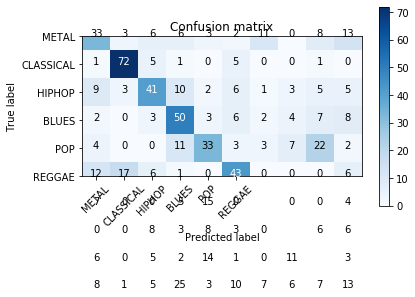

In [5]:
svm=SVC(C=100,gamma=0.08)
svm.fit(train_x,train_y)
print("Training Score: {:.3f}".format(svm.score(train_x,train_y)))
print("Test score: {:.3f}".format(svm.score(test_x,test_y)))

plot_cnf(svm,test_x,test_y,GENRES)